In [131]:
from pandas_datareader import data as pdr

In [132]:
tickers = ['voo', 'spy', 'splg', 'ivv']
df = pdr.DataReader(tickers, data_source='yahoo', start='2015-05-01', end='2021-05-01')
df.tail(5)

Attributes   Adj Close                                          Close  \
Symbols            voo         spy       splg         ivv         voo   
Date                                                                    
2021-04-26  381.311798  414.918945  48.767960  416.451721  383.859985   
2021-04-27  381.192627  414.829529  48.767960  416.322571  383.739990   
2021-04-28  381.013824  414.710297  48.758022  416.163635  383.559998   
2021-04-29  383.556824  417.353149  49.056114  418.795929  386.119995   
2021-04-30  381.023773  414.610931  48.728214  416.084167  383.570007   

Attributes                                           High              \
Symbols            spy       splg         ivv         voo         spy   
Date                                                                    
2021-04-26  417.609985  49.080002  419.250000  384.450012  418.220001   
2021-04-27  417.519989  49.080002  419.119995  384.380005  418.140015   
2021-04-28  417.399994  49.070000  418.959991  385.170013  419.010010   
2021-04-29  420.059998  49.369999  421.609985  386.739990  420.720001   
2021-04-30  417.299988  49.040001  418.880005  384.760010  418.540009   

Attributes                                Low                         \
Symbols          splg         ivv         voo         spy       splg   
Date                                                                   
2021-04-26  49.169998  419.809998  383.320007  416.809998  49.029999   
2021-04-27  49.160000  419.730011  382.720001  416.299988  48.950001   
2021-04-28  49.250000  420.600006  383.239990  416.899994  49.029999   
2021-04-29  49.450001  422.279999  382.809998  416.440002  48.959999   
2021-04-30  49.200001  420.130005  382.730011  416.339996  48.950001   

Attributes                    Open                                     \
Symbols            ivv         voo         spy       splg         ivv   
Date                                                                    
2021-04-26  418.589996  383.730011  417.440002  49.060001  419.040009   
2021-04-27  417.940002  384.200012  417.929993  49.139999  419.529999   
2021-04-28  418.500000  384.100006  417.809998  49.110001  419.380005   
2021-04-29  418.010010  386.399994  420.320007  49.430000  421.959991   
2021-04-30  417.929993  383.910004  417.630005  49.090000  419.230011   

Attributes     Volume                                    
Symbols           voo         spy       splg        ivv  
Date                                                     
2021-04-26  3125200.0  52182400.0  1481700.0  4583400.0  
2021-04-27  3370600.0  51303100.0  2252700.0  3281000.0  
2021-04-28  3960400.0  51238900.0  1354600.0  5500200.0  
2021-04-29  4209900.0  78544300.0  2095000.0  4089200.0  
2021-04-30  5219200.0  85527000.0  1991000.0  4920000.0

In [133]:
close = df['Close']

In [134]:
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')
close = close.reindex(all_weekdays)

In [135]:
close.describe()

Symbols,voo,spy,splg,ivv
count,422.000000,422.000000,422.000000,422.000000
mean,190.755356,207.948199,24.411149,209.194455
std,8.305801,8.952338,1.080628,9.060607
min,167.699997,182.860001,21.312500,183.830002
25%,186.682503,203.592499,23.871251,204.894997
50%,191.639999,208.959999,24.547501,210.169998
75%,195.934998,213.417500,25.097500,214.907501
max,209.190002,227.759995,26.770000,229.050003


In [142]:
# Relative returns
returns = df['Close'].pct_change(1)
returns.head()

Symbols,voo,spy,splg,ivv
Date,,,,
2015-05-01,NaN,NaN,NaN,NaN
2015-05-04,0.003107,0.002847,0.005232,0.003206
2015-05-05,-0.011667,-0.011452,-0.013013,-0.011560
2015-05-06,-0.004022,-0.004117,-0.005882,-0.004136
2015-05-07,0.004038,0.003990,0.007856,0.003915


In [144]:
log_returns = np.log(df['Close']).diff()
log_returns.head()

Symbols,voo,spy,splg,ivv
Date,,,,
2015-05-01,NaN,NaN,NaN,NaN
2015-05-04,0.003102,0.002843,0.005219,0.003201
2015-05-05,-0.011736,-0.011518,-0.013098,-0.011628
2015-05-06,-0.004030,-0.004125,-0.005900,-0.004145
2015-05-07,0.004030,0.003982,0.007825,0.003907


In [158]:
r_t = log_returns.tail(1).transpose()
r_t

Date,2021-04-30
Symbols,
voo,-0.006626
spy,-0.006592
splg,-0.006707
ivv,-0.006496


In [159]:
# Weights as defined above
weights_vector = pd.DataFrame(0.25, index=r_t.index, columns=r_t.columns)
#weights_vector

In [160]:
# Total log_return for the portfolio is:
portfolio_log_return = weights_vector.transpose().dot(r_t)
#portfolio_log_return

In [161]:
weights_matrix = pd.DataFrame(1 / 4, index=r_t.index, columns=r_t.columns)
#weights_matrix.tail()

In [168]:
data = close

In [169]:
short_rolling = data.rolling(window=20).mean()
long_rolling = data.rolling(window=100).mean()

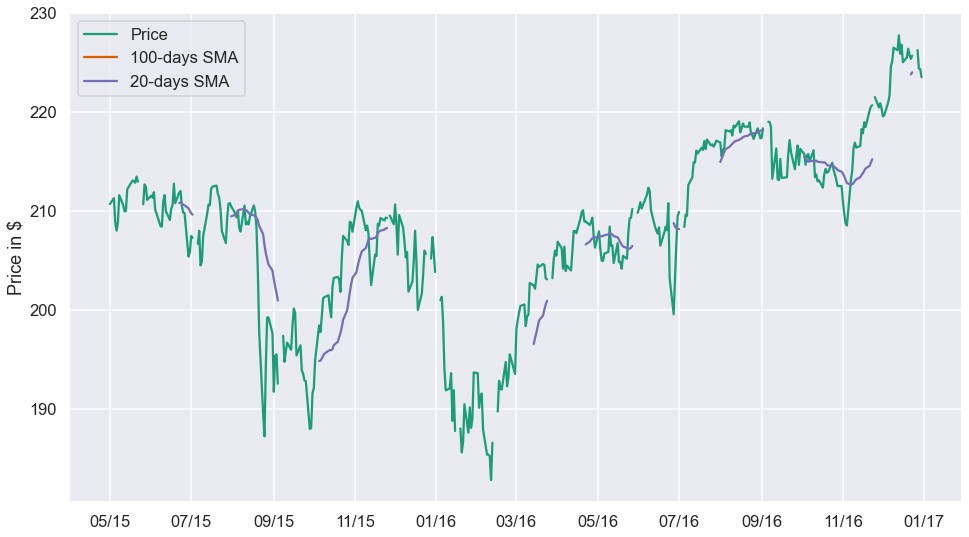

In [174]:
start_date = '2015-01-01'
end_date = '2016-12-31'
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'spy'], label='Price')
ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'spy'], label = '100-days SMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'spy'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)

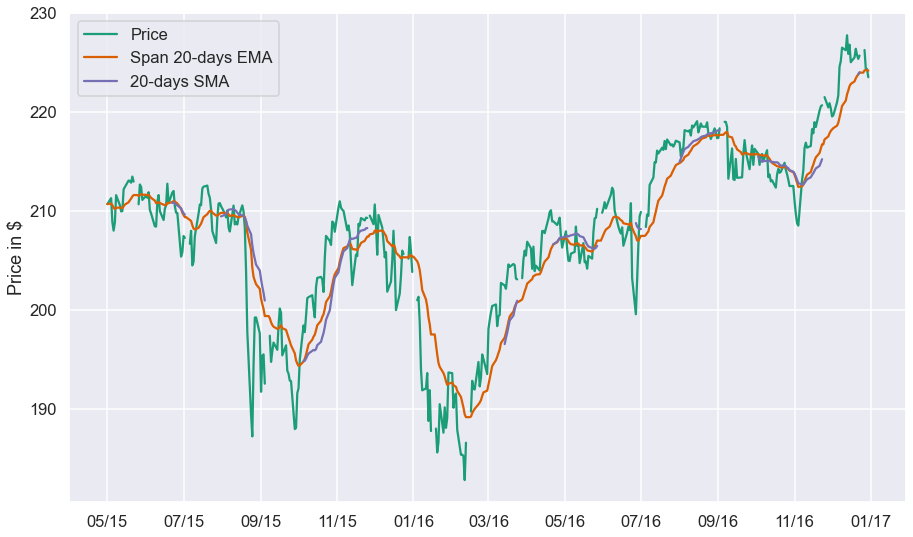

In [181]:
# Using Pandas to calculate a 20-days span EMA. adjust=False specifies that we are interested in the recursive calculation mode.
ema_short = data.ewm(span=20, adjust=False).mean()

fig, ax = plt.subplots(figsize=(15,9))

ax.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'spy'], label='Price')
ax.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'spy'], label = 'Span 20-days EMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'spy'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)
